In [186]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
# Loading the Participant info data
p_info= pd.read_excel("Humanyze_Internal_Dataset_email.xlsx")

In [143]:
p_info= p_info.replace(np.NaN, "N") #Replaced Null values with 'N'

In [144]:
p_info.head()

,UserID,Team,Location,Manager?
0,174133,Business,Boston,Y
1,174134,Business,Boston,Y
2,174138,Business,Boston,N
3,174733,Tech DC,Boston,N
4,174734,Tech DC,Boston,N


In [145]:
p_info["UserID"].value_counts() #Checking if there are multiple data points with same User ID

227533    1
286438    1
227538    1
298038    1
292634    1
292633    1
281038    1
94934     1
94933     1
174738    1
94938     1
174734    1
174733    1
286433    1
273034    1
273033    1
53534     1
260338    1
292638    1
298034    1
260833    1
286434    1
174138    1
323233    1
227534    1
174134    1
174133    1
234034    1
234033    1
323238    1
273038    1
260334    1
182838    1
323234    1
260838    1
296638    1
234038    1
298033    1
Name: UserID, dtype: int64

In [146]:
p_info_ct=p_info.groupby(["Location","Team"])["UserID"].count() #Cross Tab Analysis of Participant Info
p_info_ct

Location   Team     
Boston     Business      6
           Tech DC       9
           Tech HYPE     9
Palo Alto  Analytics    10
           Business      4
Name: UserID, dtype: int64

In [147]:
p_info_ct1=p_info.groupby(["Location","Team","Manager?"])["Manager?"].count() #Cross Tab Analysis of Participant Info 
p_info_ct1

Location   Team       Manager?
Boston     Business   N           4
                      Y           2
           Tech DC    N           7
                      Y           2
           Tech HYPE  N           7
                      Y           2
Palo Alto  Analytics  N           7
                      Y           3
           Business   N           3
                      Y           1
Name: Manager?, dtype: int64

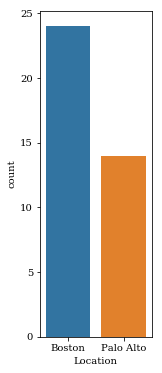

In [148]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (2, 6)
plt.rcParams['font.family'] = "serif"
sns.countplot(data=p_info, x= "Location" )
# Count plot of number of individuals at each site

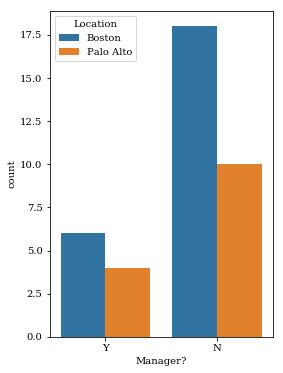

In [150]:
sns.countplot(data=p_info, x= "Manager?", hue="Location")
plt.rcParams['figure.figsize'] = (4, 6)
# Count plot of individuals with/ without managers at each site

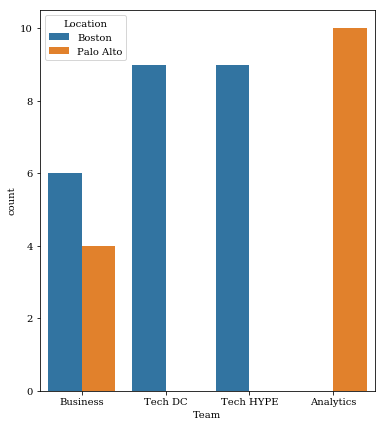

In [152]:
sns.countplot(data=p_info, x= "Team", hue="Location", linewidth=2)
plt.rcParams['figure.figsize'] = (6,7)
#Comparision of count of individuals in different teams at each site

In [153]:
daily_df= pd.read_excel("Daily Email.xlsx")  #Loading the Daily Email data
daily_df.head() 

,Date,Sender,Receiver,Receiver type,Count
0,2017-08-15,174138,174133,TO,27
1,2017-08-16,286434,281038,CC,15
2,2017-08-15,292633,182838,TO,5
3,2017-08-12,286438,234034,CC,13
4,2017-08-16,323238,227533,CC,14


In [154]:
#The Daily email data sheet doesn't have information about sender's and receiver's location and Team details.
#So, I have Merged Daily email data with Participant info data to get those details.

combined_df= pd.merge(daily_df, p_info, how= "left", left_on= "Sender", right_on="UserID")

In [155]:
combined_df.head()

,Date,Sender,Receiver,Receiver type,Count,UserID,Team,Location,Manager?
0,2017-08-15,174138,174133,TO,27,174138,Business,Boston,N
1,2017-08-16,286434,281038,CC,15,286434,Analytics,Palo Alto,N
2,2017-08-15,292633,182838,TO,5,292633,Analytics,Palo Alto,N
3,2017-08-12,286438,234034,CC,13,286438,Analytics,Palo Alto,N
4,2017-08-16,323238,227533,CC,14,323238,Tech HYPE,Boston,N


In [156]:
combined_df.rename(columns={"Team":"Sender's Team","Location":"Sender's Location", "UserID":"Sender's UserID"}, inplace= True)
combined_df.head()

,Date,Sender,Receiver,Receiver type,Count,Sender's UserID,Sender's Team,Sender's Location,Manager?
0,2017-08-15,174138,174133,TO,27,174138,Business,Boston,N
1,2017-08-16,286434,281038,CC,15,286434,Analytics,Palo Alto,N
2,2017-08-15,292633,182838,TO,5,292633,Analytics,Palo Alto,N
3,2017-08-12,286438,234034,CC,13,286438,Analytics,Palo Alto,N
4,2017-08-16,323238,227533,CC,14,323238,Tech HYPE,Boston,N


In [157]:
combined_df1= pd.merge(combined_df, p_info, how= "left", left_on= "Receiver", right_on="UserID")
combined_df1.head()

,Date,Sender,Receiver,Receiver type,Count,Sender's UserID,Sender's Team,Sender's Location,Manager?_x,UserID,Team,Location,Manager?_y
0,2017-08-15,174138,174133,TO,27,174138,Business,Boston,N,174133,Business,Boston,Y
1,2017-08-16,286434,281038,CC,15,286434,Analytics,Palo Alto,N,281038,Analytics,Palo Alto,Y
2,2017-08-15,292633,182838,TO,5,292633,Analytics,Palo Alto,N,182838,Tech DC,Boston,N
3,2017-08-12,286438,234034,CC,13,286438,Analytics,Palo Alto,N,234034,Tech HYPE,Boston,N
4,2017-08-16,323238,227533,CC,14,323238,Tech HYPE,Boston,N,227533,Tech DC,Boston,Y


In [158]:
combined_df1.rename(columns={"Team":"Receiver's Team","Location":"Receiver's Location", "UserID":"Receiver's UserID"}, inplace= True)
to_drop= ["Manager?_x","Manager?_y"]
combined_df2= combined_df1.drop(to_drop, axis=1)
combined_df2.head()

,Date,Sender,Receiver,Receiver type,Count,Sender's UserID,Sender's Team,Sender's Location,Receiver's UserID,Receiver's Team,Receiver's Location
0,2017-08-15,174138,174133,TO,27,174138,Business,Boston,174133,Business,Boston
1,2017-08-16,286434,281038,CC,15,286434,Analytics,Palo Alto,281038,Analytics,Palo Alto
2,2017-08-15,292633,182838,TO,5,292633,Analytics,Palo Alto,182838,Tech DC,Boston
3,2017-08-12,286438,234034,CC,13,286438,Analytics,Palo Alto,234034,Tech HYPE,Boston
4,2017-08-16,323238,227533,CC,14,323238,Tech HYPE,Boston,227533,Tech DC,Boston


In [159]:
to_drop= ["Sender's UserID","Receiver's UserID"]
combined_df3= combined_df2.drop(to_drop, axis=1)
combined_df3.head() 

#The data frame below has all the required information for the analysis of Question 2.

,Date,Sender,Receiver,Receiver type,Count,Sender's Team,Sender's Location,Receiver's Team,Receiver's Location
0,2017-08-15,174138,174133,TO,27,Business,Boston,Business,Boston
1,2017-08-16,286434,281038,CC,15,Analytics,Palo Alto,Analytics,Palo Alto
2,2017-08-15,292633,182838,TO,5,Analytics,Palo Alto,Tech DC,Boston
3,2017-08-12,286438,234034,CC,13,Analytics,Palo Alto,Tech HYPE,Boston
4,2017-08-16,323238,227533,CC,14,Tech HYPE,Boston,Tech DC,Boston


In [160]:
#Using group by for crosstab analysis.
combined_df3_ct=combined_df3.groupby(["Sender's Location","Sender's Team","Receiver's Location", "Receiver's Team"])["Count"].sum()
combined_df3_ct

Sender's Location  Sender's Team  Receiver's Location  Receiver's Team
Boston             Business       Boston               Business            561
                                                       Tech DC             518
                                                       Tech HYPE           462
                                  Palo Alto            Analytics           476
                                                       Business            291
                   Tech DC        Boston               Business            731
                                                       Tech DC            2253
                                                       Tech HYPE           831
                                  Palo Alto            Analytics           343
                                                       Business            135
                   Tech HYPE      Boston               Business            630
                                                       Tech 

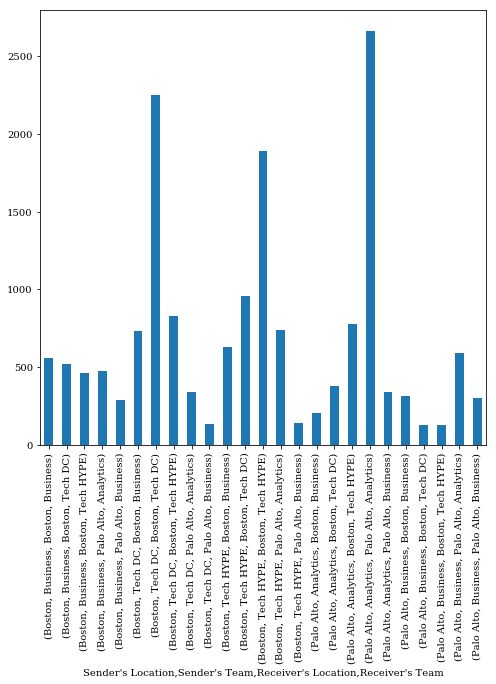

In [187]:
combined_df3_ct.plot(kind='bar',stacked=True,figsize=(8,8))

#The following plot visualizes the count of email interactions between teams at each site and across both sites.

In [182]:
Boston_Interaction= combined_df3[(combined_df3["Sender's Location"]=='Boston') & (combined_df3["Receiver's Location"]=='Boston')]
Boston_Interaction_ct=Boston_Interaction.groupby(["Sender's Team","Receiver's Team"])["Count"].sum().sort_values(ascending=False)
print(Boston_Interaction_ct)
print("Total number of email interactions between individuals at Boston Site:",(Boston_Interaction.groupby(["Sender's Team","Receiver's Team"])["Count"].sum().sort_values(ascending=False)).sum())

#The following table details about the email interactions between the individuals and teams at Boston Site.

Sender's Team  Receiver's Team
Tech DC        Tech DC            2253
Tech HYPE      Tech HYPE          1892
               Tech DC             959
Tech DC        Tech HYPE           831
               Business            731
Tech HYPE      Business            630
Business       Business            561
               Tech DC             518
               Tech HYPE           462
Name: Count, dtype: int64
Total number of email interactions between individuals at Boston Site: 8837


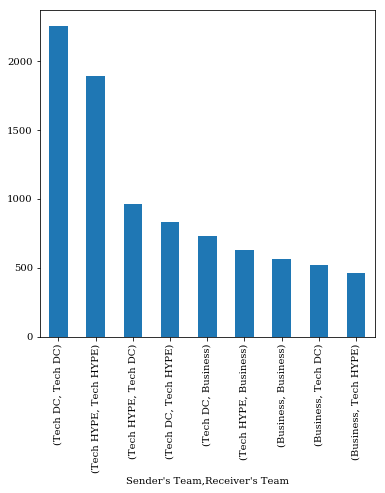

In [185]:
Boston_Interaction_ct.plot(kind='bar',stacked=True,figsize=(6,6))

In [188]:
PaloAlto_Interaction= combined_df3[(combined_df3["Sender's Location"]=='Palo Alto') & (combined_df3["Receiver's Location"]=='Palo Alto')]
PaloAlto_Interaction_ct= PaloAlto_Interaction.groupby(["Sender's Team","Receiver's Team"])["Count"].sum().sort_values(ascending=False)
print(PaloAlto_Interaction_ct)
print("Total number of email interactions between individuals at Palo Alto Site:",PaloAlto_Interaction.groupby(["Sender's Team","Receiver's Team"])["Count"].sum().sort_values(ascending=False).sum())
#The following table details about the email interactions between the individuals and teams at Palo Alto Site.

Sender's Team  Receiver's Team
Analytics      Analytics          2662
Business       Analytics           593
Analytics      Business            343
Business       Business            302
Name: Count, dtype: int64
Total number of email interactions between individuals at Palo Alto Site: 3900


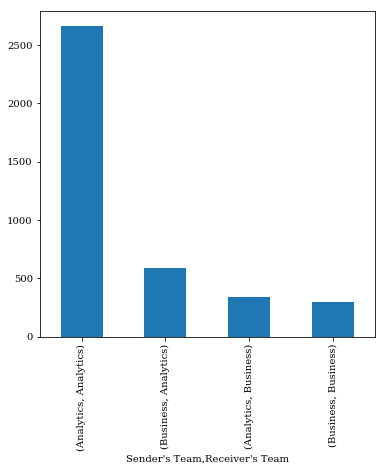

In [189]:
PaloAlto_Interaction_ct.plot(kind='bar',stacked=True,figsize=(6,6))

In [190]:
Mixed_Interaction_1=combined_df3[(combined_df3["Sender's Location"]=='Boston') & (combined_df3["Receiver's Location"]=='Palo Alto')]
Mixed_Interaction_1ct=Mixed_Interaction_1.groupby(["Sender's Team","Receiver's Team"])["Count"].sum().sort_values(ascending=False)
print(Mixed_Interaction_1ct)
print("Total number of email interactions between Boston and Palo Alto:",Mixed_Interaction_1.groupby(["Sender's Team","Receiver's Team"])["Count"].sum().sort_values(ascending=False).sum())

#The following table details about the email interactions between the individuals and teams across both the sites-
#With Sender at Boston and Reciever at Palo Alto

Sender's Team  Receiver's Team
Tech HYPE      Analytics          740
Business       Analytics          476
Tech DC        Analytics          343
Business       Business           291
Tech HYPE      Business           140
Tech DC        Business           135
Name: Count, dtype: int64
Total number of email interactions between Boston and Palo Alto: 2125


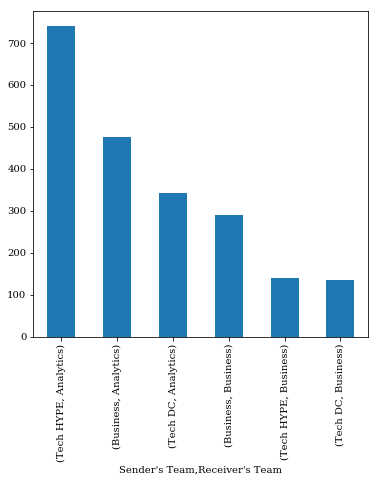

In [191]:
Mixed_Interaction_1ct.plot(kind='bar',stacked=True,figsize=(6,6))

In [193]:
Mixed_Interaction_2=combined_df3[(combined_df3["Sender's Location"]=='Palo Alto') & (combined_df3["Receiver's Location"]=='Boston')]
Mixed_Interaction_2ct= Mixed_Interaction_2.groupby(["Sender's Team","Receiver's Team"])["Count"].sum().sort_values(ascending=False)
print(Mixed_Interaction_2ct)
print("Total number of email interactions between Palo Alto and Boston:",Mixed_Interaction_2.groupby(["Sender's Team","Receiver's Team"])["Count"].sum().sort_values(ascending=False).sum())

#The following table details about the email interactions between the individuals and teams across both the sites-
#With Sender at Palo Alto and Reciever at Boston

Sender's Team  Receiver's Team
Analytics      Tech HYPE          777
               Tech DC            378
Business       Business           315
Analytics      Business           206
Business       Tech DC            131
               Tech HYPE          130
Name: Count, dtype: int64
Total number of email interactions between Palo Alto and Boston: 1937


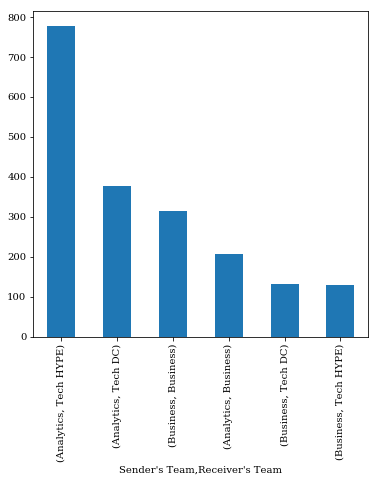

In [194]:
Mixed_Interaction_2ct.plot(kind='bar',stacked=True,figsize=(6,6))